In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("./data/data.csv")

# Set the weight for each ESG category
weights = {
    'E': 0.5,  # Environmental (E) contributes 50%
    'S': 0.3,  # Social (S) contributes 30%
    'G': 0.2   # Governance (G) contributes 20%
}

# Define categorized metrics
environmental_metrics = [
    "Greenhouse Gas Emissions('GHG')",
    "Energy Consumption(GJ)",
    "Water Consumption",
    "Waste Generation"
]

social_metrics = [
    "Age-Based Diversity(existing employees by age group)",
    "Development & Training",
    "Employment",
    "Gender Diversity",
    "Occupational Health & Safety"
]

governance_metrics = [
    "Alignment with Frameworks And Disclosure Practices",
    "Assurance of Sustainability Report",
    "Board Composition",
    "ESG-related Certifications",
    "Economic Performance",
    "Ethical Behaviour(anti-corruption)",
    "Management Diversity"
]

# Classification function
def classify_metrics(label):
    if label in environmental_metrics:
        return 'E'
    elif label in social_metrics:
        return 'S'
    elif label in governance_metrics:
        return 'G'
    else:
        return 'Unknown'

# Classify each Predicted_label
df['Category'] = df['Predicted_label'].apply(classify_metrics)

# Set score range for standardization
score_range = {
    'E': (0, 10),
    'S': (0, 10),
    'G': (0, 10)
}

# Standardize scores to range 0-100 and round to two decimal places
def standardize_score(score, score_range):
    standardized = (score - score_range[0]) / (score_range[1] - score_range[0]) * 100
    return round(standardized, 2)

# Score classification function
def categorize_score(score):
    if score < 50:
        return 'Poor'
    elif score > 70:
        return 'Good'
    else:
        return 'Average'

# Calculate ESG scores for each group
results = []

for (company, year), group in df.groupby(['Company Report Name', 'Year']):
    # Calculate the average score for each category
    category_scores = group.groupby('Category')['Score'].mean().to_dict()
    
    # Apply weights to calculate the total weighted ESG score
    weighted_score = sum(category_scores.get(cat, 0) * weights[cat] for cat in ['E', 'S', 'G'])
    
    # Standardize each category score
    standardized_scores = {
        category: standardize_score(category_scores.get(category, 0), score_range[category])
        for category in ['E', 'S', 'G']
    }
    
    # Standardize the total score
    total_standardized_score = standardize_score(weighted_score, (0, 10))
    
    # Classify the total score
    classification = categorize_score(total_standardized_score)
    
    # Collect the results for this company and year
    results.append({
        'Company Report Name': company,
        'Year': year,
        'Environmental Score': standardized_scores['E'],
        'Social Score': standardized_scores['S'],
        'Governance Score': standardized_scores['G'],
        'Total Score': total_standardized_score,
        'Score Classification': classification
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results to a new CSV file
results_df.to_csv("esg_scores_by_company_year.csv", index=False)

print("ESG scores by company and year have been saved to 'esg_scores_by_company_year.csv'")


PermissionError: [Errno 13] Permission denied: 'esg_scores_by_company_year.csv'

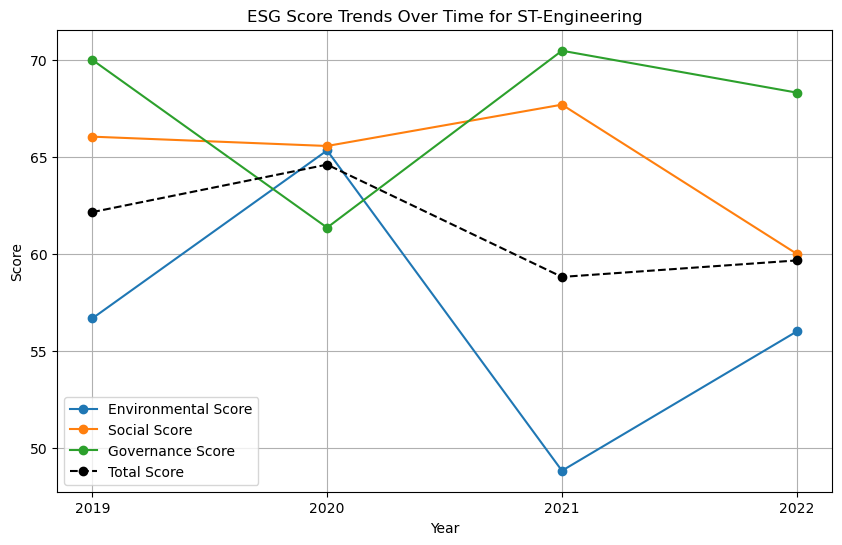

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    'Company Name': ['ST-Engineering'] * 4,
    'Year': [2019, 2020, 2021, 2022],
    'Environmental Score': [56.67, 65.33, 48.82, 56],
    'Social Score': [66.04, 65.56, 67.69, 60],
    'Governance Score': [70, 61.35, 70.47, 68.31],
    'Total Score': [62.15, 64.6, 58.81, 59.66],
    'Score Classification': ['Average', 'Average', 'Average', 'Average']
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each ESG category and Total Score
plt.plot(df['Year'], df['Environmental Score'], marker='o', label='Environmental Score')
plt.plot(df['Year'], df['Social Score'], marker='o', label='Social Score')
plt.plot(df['Year'], df['Governance Score'], marker='o', label='Governance Score')
plt.plot(df['Year'], df['Total Score'], marker='o', linestyle='--', color='black', label='Total Score')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('ESG Score Trends Over Time for ST-Engineering')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'])  # Ensure only the years in the data are shown on the x-axis

# Show the plot
plt.show()


## Benchmarks: ESG Score Rating

In [8]:
import pandas as pd

# Assuming your data is already loaded into df
# Define the metrics
metrics = [
    "Greenhouse Gas Emissions('GHG')",
    "Energy Consumption(GJ)",
    "Water Consumption",
    "Waste Generation",
    "Age-Based Diversity(existing employees by age group)",
    "Development & Training",
    "Employment",
    "Gender Diversity",
    "Occupational Health & Safety",
    "Alignment with Frameworks And Disclosure Practices",
    "Assurance of Sustainability Report",
    "Board Composition",
    "ESG-related Certifications",
    "Economic Performance",
    "Ethical Behaviour(anti-corruption)",
    "Management Diversity"
]

# Calculate the mean for each metric
mean_scores = df.groupby('Predicted_label')['Score'].mean().reset_index()
mean_scores['Score'] = mean_scores['Score'].round(2)

# Display the results
print(mean_scores)


                                      Predicted_label  Score
0   Age-Based Diversity (existing employees by age...   6.57
1   Age-Based Diversity(existing employees by age ...   5.57
2   Alignment with Frameworks And Disclosure Pract...   6.44
3                  Assurance of Sustainability Report   7.03
4                                   Board Composition   6.85
5                              Development & Training   6.49
6                          ESG-related Certifications   7.40
7                                Economic Performance   6.24
8                                          Employment   4.33
9                              Energy Consumption(GJ)   5.89
10                                  Ethical Behaviour   8.66
11                                   Gender Diversity   4.70
12                    Greenhouse Gas Emissions(“GHG”)   5.93
13                               Management Diversity   6.05
14                       Occupational Health & Safety   7.12
15                      

In [9]:
import pandas as pd

# 创建 DataFrame
data = {
    'Company Name': ['CDL_Hospitality', 'DRAX', 'Maxeon Solar Technologies', 'Vena-Energy', 'Vena-Energy', 
                     'ST-Engineering', 'ST-Engineering', 'ST-Engineering', 'ST-Engineering'],
    'Year': [2021, 2023, 2022, 2022, 2023, 2019, 2020, 2021, 2022],
    'Environmental Score': [67.5, 58.64, 60.27, 55.28, 58.81, 56.67, 65.33, 48.82, 56],
    'Social Score': [57.96, 81, 69.47, 66.79, 63.66, 66.04, 65.56, 67.69, 60],
    'Governance Score': [69.24, 70, 62.42, 59.49, 63.58, 70, 61.35, 70.47, 68.31],
    'Total Score': [64.99, 67.62, 63.46, 59.57, 61.22, 62.15, 64.6, 58.81, 59.66],
    'Score Classification': ['Average', 'Average', 'Average', 'Average', 'Average', 'Average', 'Average', 'Average', 'Average']
}

df = pd.DataFrame(data)

# 计算每列（Environmental Score, Social Score, Governance Score, Total Score）的平均值
esg_benchmark = {
    'Average Environmental Score': df['Environmental Score'].mean(),
    'Average Social Score': df['Social Score'].mean(),
    'Average Governance Score': df['Governance Score'].mean(),
    'Average Total Score': df['Total Score'].mean()
}

# 显示计算结果
print(f"Average Environmental Score: {esg_benchmark['Average Environmental Score']:.2f}")
print(f"Average Social Score: {esg_benchmark['Average Social Score']:.2f}")
print(f"Average Governance Score: {esg_benchmark['Average Governance Score']:.2f}")
print(f"Average Total Score: {esg_benchmark['Average Total Score']:.2f}")


Average Environmental Score: 58.59
Average Social Score: 66.46
Average Governance Score: 66.10
Average Total Score: 62.45


量化ESG（环境、社会和治理）绩效对公司估值和风险状况的财务影响，涉及到建立一套综合模型，能够系统地分析ESG因子与公司传统财务指标之间的关系。以下是建立这一模型的几个关键步骤：

### 1. **定义关键变量**
   - **ESG得分**：通常由第三方评级机构提供（如MSCI、Sustainalytics等）。得分可以是环境、社会、治理三大领域的综合评分，也可以细化到每个领域。
   - **财务指标**：
     - **股票价格**：反映市场对公司未来预期的看法。
     - **波动性（Volatility）**：衡量股票价格变动的幅度，通常使用标准差等指标。
     - **资本成本（Cost of Capital）**：公司的资本成本可能受到其ESG表现的影响，ESG表现越好，资本成本可能越低，因为它降低了投资者的风险预期。
     - **盈利能力指标**：如ROE、ROA等。

### 2. **构建模型框架**
   
   #### A. **ESG因子对股票价格的影响**
   - ESG绩效较好的公司可能会受到投资者的青睐，从而导致股价上升。这个影响可以通过回归分析来量化，分析ESG得分与公司股价之间的关系。
   - **股票价格模型**：
     \[
     P = \alpha + \beta_1 \times ESG + \beta_2 \times X + \epsilon
     \]
     其中，\(P\) 是股票价格，\(ESG\) 是公司ESG得分，\(X\) 是控制变量（如公司规模、行业、市场条件等），\(\epsilon\) 是误差项，\(\beta_1\) 表示ESG得分对股价的影响程度。

   #### B. **ESG因子对波动性的影响**
   - 企业的ESG表现较好可能会降低市场的不确定性和投资者的风险预期，进而减少股票价格的波动性。波动性可以通过股票收益率的标准差来衡量。
   - **波动性模型**：
     \[
     \sigma = \alpha + \beta_1 \times ESG + \beta_2 \times X + \epsilon
     \]
     其中，\(\sigma\) 是股票收益率的标准差，\(\beta_1\) 表示ESG得分对波动性的影响，\(\epsilon\) 是误差项。

   #### C. **ESG因子对资本成本的影响**
   - ESG表现较好可能使公司获得更低的资本成本，因为投资者更愿意投资于低风险的公司。可以通过加权平均资本成本（WACC）来衡量资本成本。
   - **资本成本模型**：
     \[
     WACC = \alpha + \beta_1 \times ESG + \beta_2 \times X + \epsilon
     \]
     其中，\(WACC\) 是加权平均资本成本，\(\beta_1\) 表示ESG因子对资本成本的影响。

### 3. **风险评估框架**
将ESG因子与传统的财务风险指标（如财务杠杆、流动性、信用风险等）结合，可以形成一个更加全面的风险评估框架。框架可能包括以下几个维度：

- **市场风险**：通过股价波动性、行业比较等方法衡量。
- **信用风险**：分析公司ESG得分与信用评级的关系。好的ESG表现可能提高信用评级，降低借款成本。
- **流动性风险**：良好的ESG表现可能增加投资者对公司的信任，进而提高股票的流动性。
- **操作风险**：通过分析ESG因素对公司运营和供应链管理的影响，评估潜在的运营风险。

可以通过以下方式综合评估：
\[
R = f(ESG, Leverage, Liquidity, Credit Rating, etc.)
\]
其中，\(R\) 代表综合风险评分，包含了多种风险因素（如财务杠杆、流动性、信用评级等），并通过ESG因子的影响来调整。

### 4. **实证分析**
   - 数据采集：收集多年的ESG得分、股票价格、资本成本、波动性等数据。
   - 回归分析：通过多元回归模型，量化ESG得分对这些财务指标的影响。可以使用面板数据分析（Panel Data Analysis）来控制公司和时间维度的异质性。
   - 敏感性分析：测试不同ESG因子对不同公司、行业以及市场周期下的影响差异。

### 5. **结论**
通过上述模型，可以得出以下结论：
   - **ESG得分对股价的正向影响**：高ESG得分的公司可能会因为投资者信任度较高而股价上涨。
   - **ESG得分与波动性之间的负向关系**：高ESG得分可能减少市场的不确定性，进而减少股价波动。
   - **ESG得分与资本成本的负向关系**：良好的ESG表现可能降低资本成本，提高企业的融资效率。
   - **风险评估框架的有效性**：结合传统财务风险指标和ESG因素，可以提供更加全面的风险评估，帮助投资者做出更加明智的决策。

### 6. **模型的挑战**
   - **数据可得性**：ESG得分的获取可能存在时间滞后或评级标准不统一的情况。
   - **因果关系的识别**：ESG得分与公司财务绩效之间的关系可能是双向的，需要小心控制外部变量以避免混淆。
   - **行业差异**：不同的行业中，ESG因子可能对公司估值和风险状况的影响不同，需要根据行业特征进行细化分析。

通过这样的方法和框架，能够量化ESG绩效对公司估值和风险状况的财务影响，为投资者提供更好的决策依据。

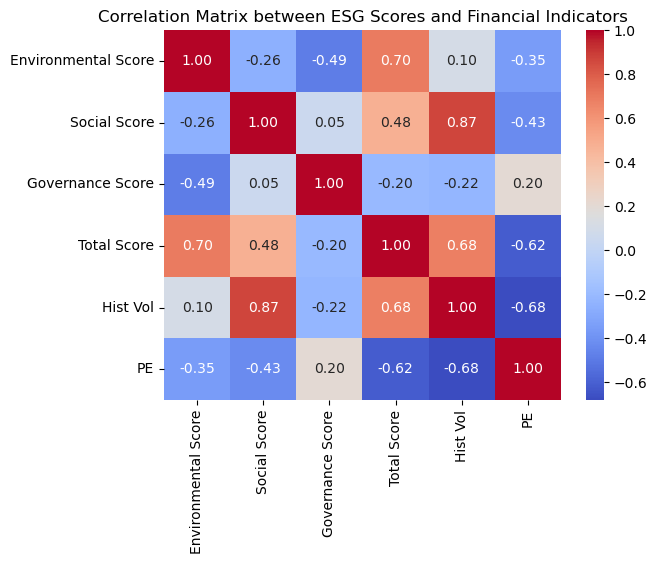

d:\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
d:\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3.067
Date:                Thu, 14 Nov 2024   Prob (F-statistic):              0.140
Time:                        17:05:44   Log-Likelihood:                -24.736
No. Observations:                   7   AIC:                             53.47
Df Residuals:                       5   BIC:                             53.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         157.5317     81.614      1.930      

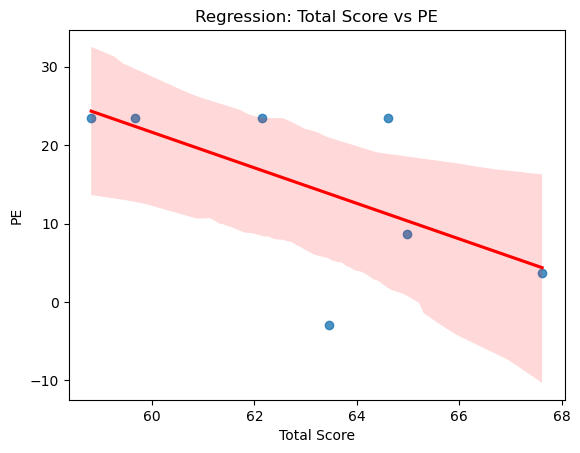

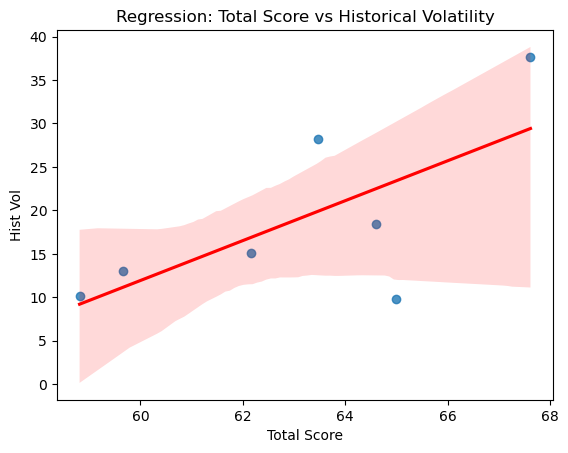

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 创建数据集
data = {
    "Company Report Name": [
        "CDL_Hospitality_report_", "DRAX-ESG--Supplement", "Maxeon Solar Technologies",
        "st-engineering-sustainability-report-", "ST-Engineering-Sustainability-Report",
        "ST-Engineering-Sustainability-Report-", "ST-Engineering-Sustainability-Report-"
    ],
    "Year": [2021, 2023, 2022, 2019, 2020, 2021, 2022],
    "Environmental Score": [67.5, 58.64, 60.27, 56.67, 65.33, 48.82, 56],
    "Social Score": [57.96, 81, 69.47, 66.04, 65.56, 67.69, 60],
    "Governance Score": [69.24, 70, 62.42, 70, 61.35, 70.47, 68.31],
    "Total Score": [64.99, 67.62, 63.46, 62.15, 64.6, 58.81, 59.66],
    "Score Classification": ["Average"] * 7,
    "Hist Vol": [9.76, 37.71, 28.26, 15.13, 18.43, 10.14, 12.97],
    "PE": [8.7, 3.7, -2.98, 23.45, 23.45, 23.45, 23.45]
}

# 转换为 DataFrame
df = pd.DataFrame(data)

# 1. 计算 ESG 分数与财务指标的相关性（过滤出数值列）
numeric_df = df[["Environmental Score", "Social Score", "Governance Score", "Total Score", "Hist Vol", "PE"]]
correlation_matrix = numeric_df.corr()

# 可视化相关性矩阵
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between ESG Scores and Financial Indicators")
plt.show()

# 2. 回归分析：Total Score 对 PE 的影响
X = df["Total Score"]  # Total Score 作为自变量
y = df["PE"]  # PE 作为因变量
X = sm.add_constant(X)  # 加入常数项

model = sm.OLS(y, X).fit()  # OLS回归模型
print(model.summary())  # 输出回归结果

# 3. 回归分析：Total Score 对历史波动率的影响
y_hist_vol = df["Hist Vol"]
model_hist_vol = sm.OLS(y_hist_vol, X).fit()  # OLS回归模型
print(model_hist_vol.summary())  # 输出回归结果

# 可视化回归结果
sns.regplot(x="Total Score", y="PE", data=df, line_kws={"color": "red"})
plt.title("Regression: Total Score vs PE")
plt.show()

sns.regplot(x="Total Score", y="Hist Vol", data=df, line_kws={"color": "red"})
plt.title("Regression: Total Score vs Historical Volatility")
plt.show()
